# Disease Data-Set KNeighborsClassifier Implementation

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Data Analysis

In [48]:
# Import the csv file
df_main = pd.read_csv("Disease.csv")

# copy the df_main as we dont want to modify the main csv file
df = df_main

# check top 5 datset columns and values
df.head()

,Disease/Infection/Virus,Fever,Cough/Cold,Fatigue,Difficulty Breathing,Body Pain,Main Symptoms,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Covid19,Yes,Yes,Yes,Yes,Yes,Loss of smell and taste,57.0,Male,High,High,Positive
1,Influenza,Yes,Yes,Yes,Yes,Yes,Diarrhea and Vomiting,26.0,Male,Normal,Normal,Positive
2,Migrane,No,Yes,No,No,No,Headaches/Light and Sound Sensitive,30.0,Female,Normal,Normal,Psitive
3,Diabetes,Yes,No,Yes,No,No,Increased Thirst and Frequent Urination,50.0,Female,Low,Low,Positive
4,ChickenPox,Yes,No,Yes,No,Yes,Raised Bumps(Papules),15.0,Male,High,Normal,Positive


In [49]:
# check shape of the dataframe, total rows-99 and total columns-12
df.shape

(99, 12)

In [50]:
# check columns in the dataframe
df.columns

Index(['Disease/Infection/Virus', 'Fever', 'Cough/Cold', 'Fatigue',
       'Difficulty Breathing', 'Body Pain', 'Main Symptoms', '     Age',
       'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable'],
      dtype='object')

In [51]:
# removing extra white spaces from all the columns, eg : Age has white space in the beginning
df.columns = df.columns.str.strip()

In [52]:
# verify the columns whate space trimmed
df.columns

Index(['Disease/Infection/Virus', 'Fever', 'Cough/Cold', 'Fatigue',
       'Difficulty Breathing', 'Body Pain', 'Main Symptoms', 'Age', 'Gender',
       'Blood Pressure', 'Cholesterol Level', 'Outcome Variable'],
      dtype='object')

In [53]:
# check basic info like total columns with Data types , there is only Age which is float dtype others are object dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Disease/Infection/Virus  99 non-null     object 
 1   Fever                    99 non-null     object 
 2   Cough/Cold               99 non-null     object 
 3   Fatigue                  99 non-null     object 
 4   Difficulty Breathing     99 non-null     object 
 5   Body Pain                99 non-null     object 
 6   Main Symptoms            99 non-null     object 
 7   Age                      97 non-null     float64
 8   Gender                   99 non-null     object 
 9   Blood Pressure           99 non-null     object 
 10  Cholesterol Level        99 non-null     object 
 11  Outcome Variable         99 non-null     object 
dtypes: float64(1), object(11)
memory usage: 9.4+ KB


In [54]:
# check for any features having null values : we need to clean all those features which are null (Age has only null with 2 null values)
df.isnull().sum()

Disease/Infection/Virus    0
Fever                      0
Cough/Cold                 0
Fatigue                    0
Difficulty Breathing       0
Body Pain                  0
Main Symptoms              0
Age                        2
Gender                     0
Blood Pressure             0
Cholesterol Level          0
Outcome Variable           0
dtype: int64

### Imputing Null Values
##### Performing Mode Imputation to fill the null values for Age feature, we assume the mode of age(most age group suffering with the disease) would be appropriate to fill the null values 

In [55]:
mode_age = df['Age'].mode()
print("Mode Age:\n", mode_age)

# if number of entries are even mode return 2 values, so we find the average of 2 values

if len(mode_age) > 1:
    # If there are two modes, calculate the average
    mode_age = (mode_age[0] + mode_age[1]) / 2
    print(f"Average of two modes: {mode_age}")
else:
    # If there is only one mode, just print it
    print(f"Single mode: {mode_age[0]}")

Mode Age:
 0    65.0
1    67.0
Name: Age, dtype: float64
Average of two modes: 66.0


In [56]:
# mode imputation for Age
df['Age'].fillna(mode_age, inplace=True)

In [57]:
# verify for null imputed for Age : no null values remaning
df.isnull().sum()

Disease/Infection/Virus    0
Fever                      0
Cough/Cold                 0
Fatigue                    0
Difficulty Breathing       0
Body Pain                  0
Main Symptoms              0
Age                        0
Gender                     0
Blood Pressure             0
Cholesterol Level          0
Outcome Variable           0
dtype: int64

## Data Cleaning
1. Handling Missing Values
2. Handling Duplicates
3. Checking Data Type

#### Checking all the unique values in Categorcial Columns and finding any missing or wrong values and cleaning it

In [58]:
# The columns has wrong value for MonkeyPox spelled as 'MoneyPox'.
df['Disease/Infection/Virus'].unique()

array(['Covid19', 'Influenza', 'Migrane', 'Diabetes', 'ChickenPox',
       'MoneyPox', 'Dengue', 'Pneumonia', 'Hepatitis', 'Diptheria',
       'Asthma', 'Brain Tumor', 'Malaria', 'Conjunctivits',
       'Spina Bifida', 'Psoariasis', 'Pnemonia'], dtype=object)

In [59]:
# Replace and clean the value for MonkeyPox, so that we do not have any wrong values 
df['Disease/Infection/Virus'] = df['Disease/Infection/Virus'].replace('MoneyPox', 'Monkey Pox')
df['Disease/Infection/Virus'].unique()

array(['Covid19', 'Influenza', 'Migrane', 'Diabetes', 'ChickenPox',
       'Monkey Pox', 'Dengue', 'Pneumonia', 'Hepatitis', 'Diptheria',
       'Asthma', 'Brain Tumor', 'Malaria', 'Conjunctivits',
       'Spina Bifida', 'Psoariasis', 'Pnemonia'], dtype=object)

In [60]:
# The Fever has 2 Categories Yes and No, but also include 'NO' with extra white space making this feature with 3 categores.
df['Fever'].unique()

array(['Yes', 'No', 'No '], dtype=object)

In [61]:
# Cleaning the feature Fever with Replacing the whitespace NO without any space
df['Fever'] = df['Fever'].replace('No ', 'No')

# now there is only 2 categorical value correctly coming as Yes and No
df['Fever'].unique()

array(['Yes', 'No'], dtype=object)

In [62]:
# The Cough/Cold has 2 Categories Yes and No, but also include 'NO' with extra white space making this feature with 3 categores.
df['Cough/Cold'].unique()

array(['Yes', 'No', 'No '], dtype=object)

In [63]:
# Cleaning the feature Cough/Cold with Replacing the whitespace NO without any space
df['Cough/Cold'] = df['Cough/Cold'].replace('No ', 'No')
df['Cough/Cold'].unique()

array(['Yes', 'No'], dtype=object)

In [64]:
# Main Sympotms Feature has wrongly spelled similar entries for Diarrhea and Vomiting.
df['Main Symptoms'].unique()

array(['Loss of smell and taste', 'Diarrhea and Vomiting',
       'Headaches/Light and Sound Sensitive',
       'Increased Thirst and Frequent Urination', 'Raised Bumps(Papules)',
       'Mild Bleeding(Mouth/Nose)', 'Cough with Mucus',
       'Loss of Appetite/Diarrhea and Vomiting',
       'Grey Membrane covering throat and tonsils', 'Chest Tightness',
       'Headaches Pain Severe/Blurred Vision/Limbs weak',
       'Diarrhea and Vomiting/Nausea', 'Redness,Itchiness,Puffy eyes',
       'Not Develop Spinal Cord Properly', 'Joint Pain', 'No',
       'Diarrhea and Vomitng', 'Vomiting'], dtype=object)

In [65]:
# Cleaning wrongly spelled similar entries for Diarrhea and Vomiting by using replace method
df['Main Symptoms'] = df['Main Symptoms'].replace('Diarrhea and Vomitng', 'Diarrhea and Vomiting')
df['Main Symptoms'].unique()

array(['Loss of smell and taste', 'Diarrhea and Vomiting',
       'Headaches/Light and Sound Sensitive',
       'Increased Thirst and Frequent Urination', 'Raised Bumps(Papules)',
       'Mild Bleeding(Mouth/Nose)', 'Cough with Mucus',
       'Loss of Appetite/Diarrhea and Vomiting',
       'Grey Membrane covering throat and tonsils', 'Chest Tightness',
       'Headaches Pain Severe/Blurred Vision/Limbs weak',
       'Diarrhea and Vomiting/Nausea', 'Redness,Itchiness,Puffy eyes',
       'Not Develop Spinal Cord Properly', 'Joint Pain', 'No', 'Vomiting'],
      dtype=object)

In [66]:
# The Outcome Variable has 2 Categories Positive and Negative, but also include 'Psitive' as wrong entry, making this feature with 3 categores.
df['Outcome Variable'].unique()

array(['Positive', 'Psitive', 'Negative'], dtype=object)

In [67]:
# Cleaning Outcome Variable to just have Positive and Negative and replacing the wrong entry
df['Outcome Variable'] = df['Outcome Variable'].replace('Psitive', 'Positive')
df['Outcome Variable'].unique()

array(['Positive', 'Negative'], dtype=object)

## Data Visualization
##### Visualizing using seaborn : how age affects the different types of Diseases

#### Plotting Disease/Virus by Age to Analyze how the Disease affect with the age

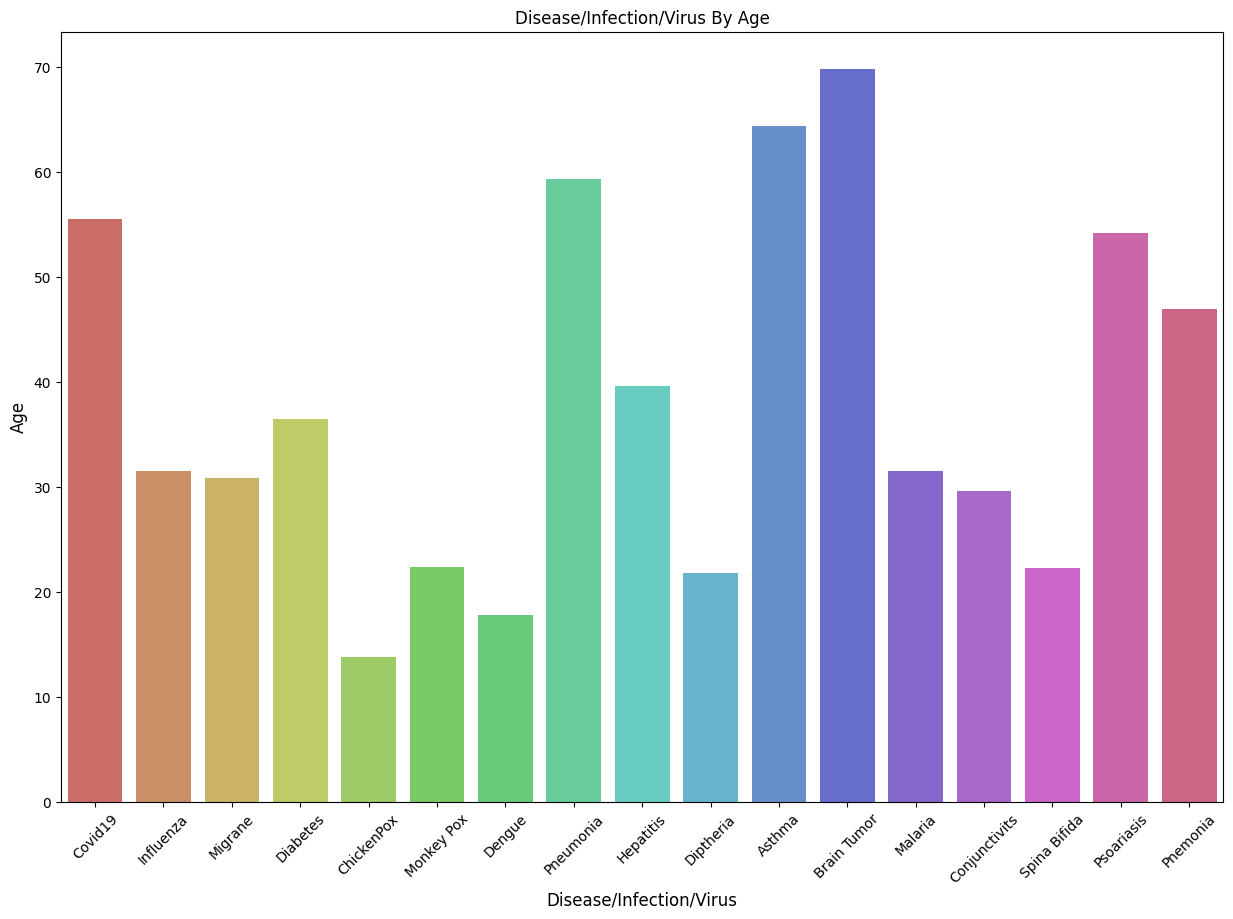

In [68]:
plt.figure(figsize=(15,10))
sns.barplot(x='Disease/Infection/Virus', y='Age', data=df, hue="Disease/Infection/Virus", palette='hls', ci=None)
plt.title("Disease/Infection/Virus By Age")
plt.xlabel('Disease/Infection/Virus', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Feature Engineering
#### We need to convert all the features into int or float datatype as machines can only work on these data types only. So we perform different kind of encoding techniques based on categories of features we have.
1. `Disease/Infection/Virus`, `Main Symptoms`, `Gender`  - Performing One-hot-encoding (There are multiple Categories in Disease and Symptoms Columns so we use One-Hot-Encoding.
Note: Gender has 2 Categores Male and Female, but instead of encoding to 0 or 1 we are performing One hot encoding becuase model may focus more during training for the category assigned with 1 and give biased prediction)
   
3. `Fever`, `Cough/Cold`, `Fatigue`, `Difficulty Breathing`, `Body Pain`, `Outcome Variable`  - Performing Label Encoding for Categorical Columns(Since this is a Binary Categorcial Column like (Yes, NO), so we will use Label encoding to encode these categories with 0 or 1)

   
4. `Blood Pressure`, `Cholesterol Level` - Performing Ordinal Encoding (We are using ordinal encoding because ordinal encodes the categroes in order, and since we have categories like(Low, Normal, High), for this model can perform based on the ordered labels eg. for High Blood Pressure model will give more weitage during training)

##### Perfoming Label Encoding on ['Fever', 'Cough/Cold', 'Fatigue', 'Difficulty Breathing', 'Body Pain', 'Outcome Variable']

In [69]:
# import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# initialize label encoder
label_encoder = LabelEncoder()

# list of clumns to apply label encoder
categ_col = ['Fever', 'Cough/Cold', 'Fatigue', 'Difficulty Breathing', 'Body Pain', 'Outcome Variable']

#iterate over columns to perfom label encoder
for col in categ_col:
    df[col] = label_encoder.fit_transform(df[col])

# verify these columns tranformed to have 0 and 1
df.head()

,Disease/Infection/Virus,Fever,Cough/Cold,Fatigue,Difficulty Breathing,Body Pain,Main Symptoms,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Covid19,1,1,1,1,1,Loss of smell and taste,57.0,Male,High,High,1
1,Influenza,1,1,1,1,1,Diarrhea and Vomiting,26.0,Male,Normal,Normal,1
2,Migrane,0,1,0,0,0,Headaches/Light and Sound Sensitive,30.0,Female,Normal,Normal,1
3,Diabetes,1,0,1,0,0,Increased Thirst and Frequent Urination,50.0,Female,Low,Low,1
4,ChickenPox,1,0,1,0,1,Raised Bumps(Papules),15.0,Male,High,Normal,1


#### Perfoming Ordinal Encoding

In [70]:
# import Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder

## create an instance of ORdinalEncoder and then fit_transform
ordinal_encoder=OrdinalEncoder(categories=[['Low','Normal','High']])

# add a new column to the datframe with encoded ordinal values for Blood Pressure and Cholestrol Level.(Both hs similar categories Low, Normal and High)
df['Blood_Pressure_ordinal'] = ordinal_encoder.fit_transform(df[['Blood Pressure']])
df['Cholesterol_Level_ordinal'] = ordinal_encoder.fit_transform(df[['Cholesterol Level']])

# drop the original feature as we already encoded original as we dont want the entries in string to be passed on to the model
df.drop(columns=['Blood Pressure', 'Cholesterol Level'], inplace=True)

# verify the new encoded (Blood_Pressure_ordinal , Cholesterol_Level_ordinal) columns and originals are dropped
df.head()

,Disease/Infection/Virus,Fever,Cough/Cold,Fatigue,Difficulty Breathing,Body Pain,Main Symptoms,Age,Gender,Outcome Variable,Blood_Pressure_ordinal,Cholesterol_Level_ordinal
0,Covid19,1,1,1,1,1,Loss of smell and taste,57.0,Male,1,2.0,2.0
1,Influenza,1,1,1,1,1,Diarrhea and Vomiting,26.0,Male,1,1.0,1.0
2,Migrane,0,1,0,0,0,Headaches/Light and Sound Sensitive,30.0,Female,1,1.0,1.0
3,Diabetes,1,0,1,0,0,Increased Thirst and Frequent Urination,50.0,Female,1,0.0,0.0
4,ChickenPox,1,0,1,0,1,Raised Bumps(Papules),15.0,Male,1,2.0,1.0


## Use Train test split for Training and Testing the Model's Prediction

In [71]:
#Creating Indepnedent Feature and assigning to variable X
X = df.drop('Outcome Variable', axis=1)

In [72]:
# verify the Outcome variable is not there as this will be independent feature
X.head()

,Disease/Infection/Virus,Fever,Cough/Cold,Fatigue,Difficulty Breathing,Body Pain,Main Symptoms,Age,Gender,Blood_Pressure_ordinal,Cholesterol_Level_ordinal
0,Covid19,1,1,1,1,1,Loss of smell and taste,57.0,Male,2.0,2.0
1,Influenza,1,1,1,1,1,Diarrhea and Vomiting,26.0,Male,1.0,1.0
2,Migrane,0,1,0,0,0,Headaches/Light and Sound Sensitive,30.0,Female,1.0,1.0
3,Diabetes,1,0,1,0,0,Increased Thirst and Frequent Urination,50.0,Female,0.0,0.0
4,ChickenPox,1,0,1,0,1,Raised Bumps(Papules),15.0,Male,2.0,1.0


In [73]:
# Creating Dependent feature and assigning to variable Y
Y = df['Outcome Variable']

In [74]:
from sklearn.model_selection import train_test_split

# get our train test split dataset from the train_test_split method
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=21)

#### Perform One Hot Encoding on Columns 'Disease/Infection/Virus', 'Main Symptoms', 'Gender'

In [75]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

# Define columns for one hot encoding columns
ohe_features = ['Disease/Infection/Virus', 'Main Symptoms', 'Gender']

# Define transformers for one hot encoding
ohe_transformer = OneHotEncoder(drop='first', sparse_output=False)

# Create column transformer
preprocessor = ColumnTransformer([
    ("OneHotEncoder", ohe_transformer, ohe_features),
])

# Fit on training data
X_train = preprocessor.fit_transform(X_train)

# Only Transform Test Data
X_test = preprocessor.transform(X_test)        

In [76]:
#Now perform Model Training : using KNeighborsClassifier since our Outcome Variable is a Categorical ie, a Classification data(Positive/Negative)
from sklearn.neighbors import KNeighborsClassifier

#Using with default parameters
k_neighbour = KNeighborsClassifier()
k_neighbour.fit(X_train, Y_train)

KNeighborsClassifier()

In [77]:
# Predict on test data
y_pred = k_neighbour.predict(X_test)

# Predicted output on test data
print(y_pred)

[1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1]


In [78]:
# Check accuracy score of the model, that is how well our model is predicting
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
score = accuracy_score(Y_test, y_pred)
print('Score: ',score)
print('Score in pcnt:', score * 100, '%')
cm = confusion_matrix(Y_test, y_pred)
print('Confusion Matrix: \n',cm)
cr = classification_report(Y_test, y_pred)
print('Report:\n',cr)

Score:  0.9
Score in pcnt: 90.0 %
Confusion Matrix: 
 [[ 9  3]
 [ 0 18]]
Report:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86        12
           1       0.86      1.00      0.92        18

    accuracy                           0.90        30
   macro avg       0.93      0.88      0.89        30
weighted avg       0.91      0.90      0.90        30



##### The recall of 100 percent for (1) class that is `positive` , indicates that the model is correctly predicting all positive cases, which is very important for Medical Diagnosis

## Hyperparamter Tuning KNeighborsClassifier using GridSearchCv

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
model = KNeighborsClassifier()

In [81]:
# setting the K-neighbours param
k_params = {
   "n_neighbors": [5, 3, 7],
    "weights": ['uniform', 'distance'],
    "algorithm": ['ball_tree', 'kd_tree', 'brute'],
    "p":[1, 2],
}

In [82]:
# initializing gridsearch cv with the params
grid = GridSearchCV(estimator=model, param_grid=k_params, cv=7, verbose=2, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, Y_train)

Fitting 7 folds for each of 36 candidates, totalling 252 fits


GridSearchCV(cv=7, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 3, 7], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

In [83]:
grid.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}

In [84]:
grid.best_score_

np.float64(0.7682539682539683)

In [85]:
y_pred = grid.predict(X_test)

In [86]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
score = accuracy_score(Y_test, y_pred)
print('Score: ',score)
print('Score in pcnt:', score * 100, '%')
cm = confusion_matrix(Y_test, y_pred)
print('Confusion Matrix: \n',cm)
cr = classification_report(Y_test, y_pred)
print('Report:\n',cr)

Score:  0.8
Score in pcnt: 80.0 %
Confusion Matrix: 
 [[ 7  5]
 [ 1 17]]
Report:
               precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.77      0.94      0.85        18

    accuracy                           0.80        30
   macro avg       0.82      0.76      0.77        30
weighted avg       0.81      0.80      0.79        30

